# Project with MIMIC-III

In [2]:
# import needed libraries

# plot inside the notebook
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

### collect the patient id and the expire flag (0 = survived, 1 = deceased) into array expire 

In [3]:
expire = np.array(np.loadtxt("PATIENTS.csv", delimiter = ',', skiprows = 1, usecols = (1,7)))

### collect the patient id and the length of the ICU stay in days (LOS) into array LOS

In [4]:
LOS = np.array(np.genfromtxt("ICUSTAYS.csv", delimiter = ',', skip_header = 1, usecols = (1,11)))

### collect the patient id and the number of procedures performed in the ICU into array num_proc 

In [5]:
num_proc = np.array(np.genfromtxt("PROCEDURES_ICD.csv", delimiter = ',', skip_header = 1, usecols = (1,3)))

In [6]:
# retain only the total number of procedures
del_index = []
for i in range(len(num_proc[:,0])-1) :
    if (num_proc[i,0] == num_proc[i+1,0]) :
        del_index.append(i)
        
num_proc = np.delete(num_proc, del_index, 0)        

### merge expire flag, the LOS, and the num_proc into array dataset
array dataset header: "patient id", "expire flag", "LOS", "num_proc"

In [7]:
dataset = np.hstack([expire,np.array(np.zeros((len(expire),2)))])

In [8]:
for i in range(len(expire[:,0])) :
    for j in range(len(LOS[:,0])) :               
        if (expire[i,0] == LOS[j,0]) :
            dataset[i,2] = LOS[j,1]

In [9]:
for i in range(len(expire[:,0])) :
    for j in range(len(num_proc[:,0])) :               
        if (expire[i,0] == num_proc[j,0]) :
            dataset[i,3] = num_proc[j,1]

In [14]:
# delete patients with no procedure record
del_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,3] == 0) :
        del_index.append(i)
        
dataset = np.delete(dataset, del_index, 0) 

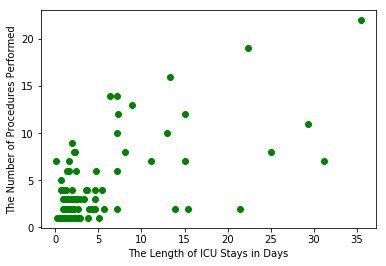

In [15]:
plt.plot(dataset[:,2],dataset[:,3],'go')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Number of Procedures Performed')
plt.show()

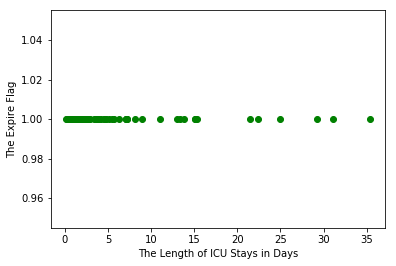

In [16]:
plt.plot(dataset[:,2],dataset[:,1],'go')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Expire Flag')
plt.show()

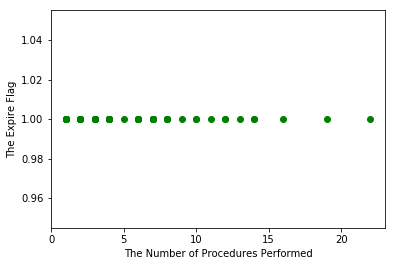

In [17]:
plt.plot(dataset[:,3],dataset[:,1],'go')
plt.xlabel('The Number of Procedures Performed')
plt.ylabel('The Expire Flag')
plt.show()

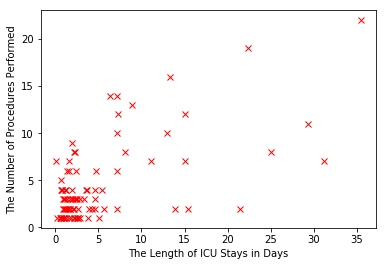

In [18]:
survived_index = []
deceased_index = []
for i in range(len(dataset[:,0])) :
    if (dataset[i,1] == 0) :
        survive_index.append(i)
    else :
        deceased_index.append(i)
        
survived = np.delete(dataset, deceased_index, 0)
deceased = np.delete(dataset, survived_index, 0)
plt.plot(deceased[:,2],deceased[:,3], 'rx', survived[:,2],survived[:,3], 'bo')
plt.xlabel('The Length of ICU Stays in Days')
plt.ylabel('The Number of Procedures Performed')
plt.show()

### Logistic Regression to model the Expire Flag in terms of LOS and num_proc

In [19]:
# preparing input X and outupt Y 
X = dataset[:,2:]
Y = dataset[:,1]

In [ ]:
dataset

###  classification using NN with one hidden layer with 5 nodes   

In [20]:
# import needed keras libraries
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
# creat and compile NN model
model = Sequential()
model.add(Dense(5, input_dim = 2, init = 'normal', activation = 'relu'))
model.add(Dense(1, init = 'normal', activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
# train NN model (experiment with nb_epoch and batch_size)
model.fit(X, Y, nb_epoch = 10, batch_size = 10)

Epoch 1/10


InternalError: Blas SGEMM launch failed : a.shape=(10, 2), b.shape=(2, 5), m=10, n=5, k=2
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]
	 [[Node: mul_1/_39 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_165_mul_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'MatMul', defined at:
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-a540b663ccc9>", line 3, in <module>
    model.add(Dense(5, input_dim = 2, init = 'normal', activation = 'relu'))
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/models.py", line 299, in add
    layer.create_input_layer(batch_input_shape, input_dtype)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/engine/topology.py", line 401, in create_input_layer
    self(x)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/engine/topology.py", line 572, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/engine/topology.py", line 635, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/engine/topology.py", line 166, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/layers/core.py", line 813, in call
    output = K.dot(x, self.W)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 814, in dot
    out = tf.matmul(x, y)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1765, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/soe/tessue/anaconda3/envs/DLK1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(10, 2), b.shape=(2, 5), m=10, n=5, k=2
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]
	 [[Node: mul_1/_39 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_165_mul_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
X.shape

In [ ]:
Y.shape